## Multiple linear Regression

<center>
<h1 style=color:blue>STUDENT PERFORMANCE</h1>
<!-- <img src='"C:\Users\KARISHMA\Desktop\imarticus\Machine Learning\project\download (4).jpeg"'> -->
</center>

In [27]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

### Loading data

In [3]:
student=pd.read_csv(r'C:\Users\KARISHMA\Desktop\imarticus\Machine Learning\SL\project\Student_Performance.csv')
student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
rows,cols=student.shape
print('No of rows:',rows)
print('No of columns:',cols)

No of rows: 10000
No of columns: 6


In [5]:
student.describe(include='all').fillna('-')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.0,10000.0,10000,10000.0,10000.0,10000.0
unique,-,-,2,-,-,-
top,-,-,No,-,-,-
freq,-,-,5052,-,-,-
mean,4.9929,69.4457,-,6.5306,4.5833,55.2248
std,2.589309,17.343152,-,1.695863,2.867348,19.212558
min,1.0,40.0,-,4.0,0.0,10.0
25%,3.0,54.0,-,5.0,2.0,40.0
50%,5.0,69.0,-,7.0,5.0,55.0
75%,7.0,85.0,-,8.0,7.0,71.0


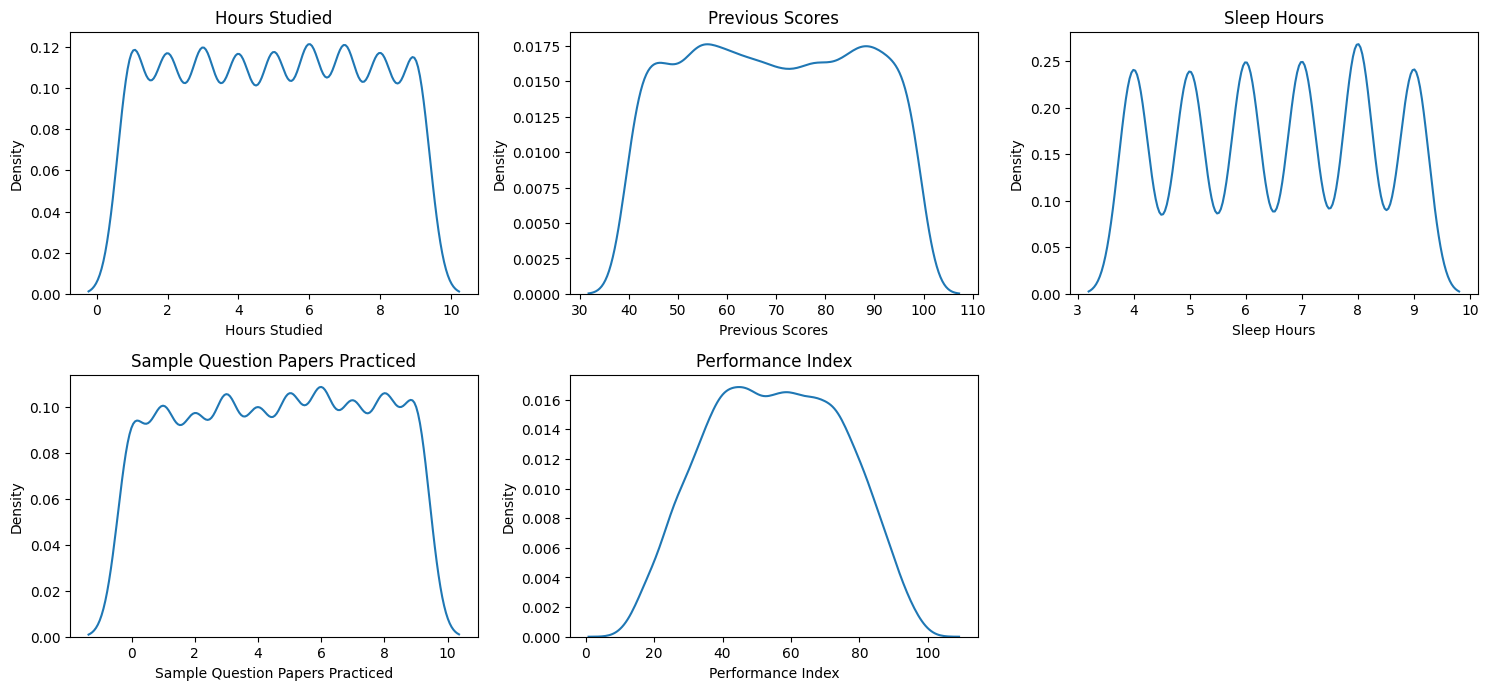

In [6]:
skewness = student.drop(columns='Extracurricular Activities',axis=1)

plt.figure(figsize=(15,10))

for i , column in enumerate(skewness,1):
    plt.subplot(3,3,i)
    sns.kdeplot(skewness[column])
    plt.title(f"{column}")

plt.tight_layout()
plt.show()

In [9]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
student.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
student.head()
ch = student.columns
columns = [i.replace(' ','_') for i in student.columns]
columns

['Hours_Studied',
 'Previous_Scores',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Sample_Question_Papers_Practiced',
 'Performance_Index']

In [12]:
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [13]:
student.rename(columns={'Hours Studied':'Hours_Studied','Previous Scores':'Previous_Scores','Extracurricular Activities':'Extracurricular_Activities','Sleep Hours':'Sleep_Hours','Sample Question Papers Practiced':'Sample_Question_Papers_Practiced','Performance Index':'Performance_Index'},inplace=True)

In [14]:
student.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [15]:
x = student[['Hours_Studied','Previous_Scores','Extracurricular_Activities','Sleep_Hours','Sample_Question_Papers_Practiced']]
y = student['Performance_Index']
x,y

(      Hours_Studied  Previous_Scores Extracurricular_Activities  Sleep_Hours  \
 0                 7               99                        Yes            9   
 1                 4               82                         No            4   
 2                 8               51                        Yes            7   
 3                 5               52                        Yes            5   
 4                 7               75                         No            8   
 ...             ...              ...                        ...          ...   
 9995              1               49                        Yes            4   
 9996              7               64                        Yes            8   
 9997              6               83                        Yes            8   
 9998              9               97                        Yes            7   
 9999              7               74                         No            8   
 
       Sample_Question_Pap

In [16]:
x

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [140]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance_Index, Length: 10000, dtype: float64

In [17]:
student=pd.get_dummies(student,columns=['Extracurricular_Activities'])

In [18]:
x = student.drop(columns=('Performance_Index'))

In [19]:
y = student.Performance_Index

In [22]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

x_train,x_tst,y_train,y_tst = train_test_split(x,y,test_size=.20,shuffle=False)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(x_tst)

In [28]:
mse=mean_squared_error(y_tst,y_pred)
mse
r2=r2_score(y_tst,y_pred)
mse,r2

(4.247182985000946, 0.9883699138186105)